In [2]:
import os, shutil

In [3]:
#load train data
original_dataset_dir = '/Users/nishithareddy/Desktop/histopathologic-cancer-detection/train'# This is the location of the data folder which has train and test subfolders

In [4]:
base_dir = '/Users/nishithareddy/Desktop/histopathologic-cancer-detection/images_data' # This is the new folder location where we will copy our training images
try:
    os.mkdir(base_dir)
except:
    pass

In [5]:
# Creating separate directories for training and validation dataset
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir) (created once not needed)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir) (created once not needed)


In [6]:
# creating separate subfolders for each class i.e. tumor and non tumor for both training and validation datasets
train_tumor_dir = os.path.join(train_dir, 'tumor')
#os.mkdir(train_tumor_dir)
train_nontumor_dir = os.path.join(train_dir, 'nontumor')
#os.mkdir(train_nontumor_dir)
validation_tumor_dir = os.path.join(validation_dir, 'tumor')
#os.mkdir(validation_tumor_dir)
validation_nontumor_dir = os.path.join(validation_dir, 'nontumor')
#os.mkdir(validation_nontumor_dir)


In [7]:
# Reading training labels
import pandas as pd

train_labels = pd.read_csv("train_labels.csv")
train_labels.head()


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [8]:
#separating tumoros and non tumoros data
train_labels_tumor = train_labels[train_labels['label']==1]
train_labels_nontumor = train_labels[train_labels['label']==0]


train_labels_tumor.reset_index(inplace=True)
train_labels_nontumor.reset_index(inplace=True)

In [9]:
train_labels_tumor

,index,id,label
0,1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
1,6,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1
2,7,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1
3,11,c3d660212bf2a11c994e0eadff13770a9927b731,1
4,14,94fa32b29cc1c00403176c0795fffa3cfaa0f20e,1
...,...,...,...
89112,220010,8a25b1632a1859d7b757e912ca673385b64e1b1d,1
89113,220012,3e24dd48c3a419f4d669cac3cf71e777ba100541,1
89114,220014,309210db7f424edbc22b2d13bf2fa27518b18f5c,1
89115,220021,d4b854fe38b07fe2831ad73892b3cec877689576,1


In [10]:
train_labels_nontumor

,index,id,label
0,0,f38a6374c348f90b587e046aac6079959adf3835,0
1,2,755db6279dae599ebb4d39a9123cce439965282d,0
2,3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
3,4,068aba587a4950175d04c680d38943fd488d6a9d,0
4,5,acfe80838488fae3c89bd21ade75be5c34e66be7,0
...,...,...,...
130903,220018,cdf7171a796090072ce521012497c78c9a56cad3,0
130904,220019,1fdacc29221a64e39d5d294d114c9e29da8705ae,0
130905,220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
130906,220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0


In [11]:
train_labels_tumor.shape, train_labels_nontumor.shape


((89117, 3), (130908, 3))

In [12]:
89117*.8,130908*.8

(71293.6, 104726.40000000001)

In [13]:
# Copying the images to the directories created above an
for i,row in train_labels_tumor.iloc[:71293,:].iterrows():
    src = os.path.join(original_dataset_dir, row['id']+'.tif')
    dst = os.path.join(train_tumor_dir, row['id']+'.tif')
    #shutil.copyfile(src, dst) 

print("#Training tumor done")   

for i,row in train_labels_nontumor.iloc[:1047264,:].iterrows():
    src = os.path.join(original_dataset_dir, row['id']+'.tif')
    dst = os.path.join(train_nontumor_dir, row['id']+'.tif')
    #shutil.copyfile(src, dst)

print("#Training non tumor done")   
 
        

#Training tumor done
#Training non tumor done


In [14]:

for i,row in train_labels_tumor.iloc[71293:89117,:].iterrows():
    src = os.path.join(original_dataset_dir, row['id']+'.tif')
    dst = os.path.join(validation_tumor_dir, row['id']+'.tif')
    #shutil.copyfile(src, dst)
    
print("#Validation tumor done")   
    
for i,row in train_labels_nontumor.iloc[104726:130908,:].iterrows():
    src = os.path.join(original_dataset_dir, row['id']+'.tif')
    dst = os.path.join(validation_nontumor_dir, row['id']+'.tif')
    #shutil.copyfile(src, dst)
    
print("#Validation non tumor done")  

#Validation tumor done
#Validation non tumor done


In [15]:
print('total training tumor images:', len(os.listdir(train_tumor_dir)))
print('total training nontumor images:', len(os.listdir(train_nontumor_dir)))

print('total validation tumor images:', len(os.listdir(validation_tumor_dir)))
print('total validation nontumor images:', len(os.listdir(validation_nontumor_dir)))


total training tumor images: 71293
total training nontumor images: 130908
total validation tumor images: 17824
total validation nontumor images: 26182


USE 3 LAYERS OF CONVOLUTIONAL MAX P00LING , 1 DENSE LAYER , AT THE FINAL LAYER WE FLATTEN AND ADD A DENSE LAYER WITH 512 NODES, THEN ADD OUTPUT LAYER

Total of 16 filters in layer 1 and chose 3X3 as kernel size. Max pooling is then used to reduce the spatial dimensions of the output volume.
 64 filters in layer 1
  128 filters in layer 1

In [16]:
# Building the network

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

USEING SGD OPTIMIZER TO START WITH

In [18]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['acc'])

CREATING TRAINING AND VALIDATION DATA


In [19]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)   #scaling to bring the number to 0-1 for the colors 
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(32, 32),
                batch_size=20,
                class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
                validation_dir,
                target_size=(32, 32),
                batch_size=20,
                class_mode='binary')

Found 202201 images belonging to 2 classes.
Found 44006 images belonging to 2 classes.


USE 30 EPOCHS AND 100 STEPS

In [113]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=100)

/Users/nishithareddy/.local/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 13s 119ms/step - loss: 0.4626 - acc: 0.7855 - val_loss: 0.4774 - val_acc: 0.7925
Epoch 2/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4957 - acc: 0.7640 - val_loss: 0.4980 - val_acc: 0.7700
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.4677 - acc: 0.7815 - val_loss: 0.4948 - val_acc: 0.7705
Epoch 4/30
100/100 [==============================] - 8s 84ms/step - loss: 0.4842 - acc: 0.7785 - val_loss: 0.5244 - val_acc: 0.7500
Epoch 5/30
100/100 [==============================] - 9s 90ms/step - loss: 0.4764 - acc: 0.7745 - val_loss: 0.4745 - val_acc: 0.7860
Epoch 6/30
100/100 [==============================] - 10s 101ms/step - loss: 0.4587 - acc: 0.7850 - val_loss: 0.5457 - val_acc: 0.7365
Epoch 7/30
100/100 [==============================] - 9s 94ms/step - loss: 0.4787 - acc: 0.7780 - val_loss: 0.5277 - val_acc: 0.7520
Epoch 8/30
100/100 [==============================] - 7s 69ms/s

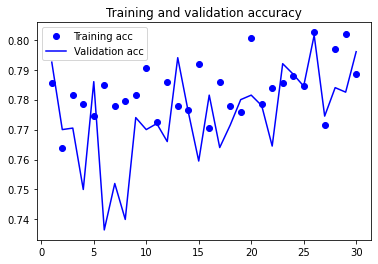

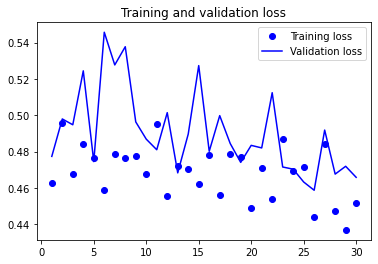

In [128]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

TRAINING FOR 43 EPOCHS AND 100 STEPS

In [20]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=43,
            validation_data=validation_generator,
            validation_steps=100)

/Users/nishithareddy/.local/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/43
100/100 [==============================] - 8s 73ms/step - loss: 0.6501 - acc: 0.6460 - val_loss: 0.6905 - val_acc: 0.5815
Epoch 2/43
100/100 [==============================] - 7s 69ms/step - loss: 0.6453 - acc: 0.6395 - val_loss: 0.6677 - val_acc: 0.5965
Epoch 3/43
100/100 [==============================] - 7s 70ms/step - loss: 0.6339 - acc: 0.6510 - val_loss: 0.6646 - val_acc: 0.5975
Epoch 4/43
100/100 [==============================] - 8s 78ms/step - loss: 0.6280 - acc: 0.6560 - val_loss: 0.6812 - val_acc: 0.5860
Epoch 5/43
100/100 [==============================] - 7s 70ms/step - loss: 0.6241 - acc: 0.6550 - val_loss: 0.6590 - val_acc: 0.5775
Epoch 6/43
100/100 [==============================] - 7s 73ms/step - loss: 0.6109 - acc: 0.6640 - val_loss: 0.6484 - val_acc: 0.6010
Epoch 7/43
100/100 [==============================] - 7s 73ms/step - loss: 0.6134 - acc: 0.6520 - val_loss: 0.6359 - val_acc: 0.5995
Epoch 8/43
100/100 [==============================] - 7s 74ms/step - 

PLOTTING GRAPHS

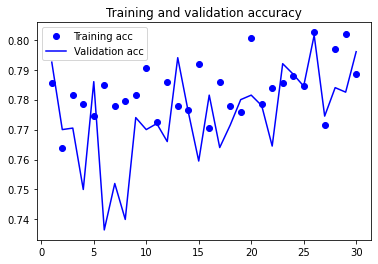

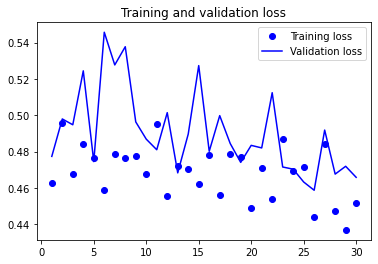

In [114]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Training for 50 epochs 200 


In [22]:
historyb = model.fit_generator(
            train_generator,
            steps_per_epoch=200,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=200)

Epoch 1/50
200/200 [==============================] - 14s 68ms/step - loss: 0.4657 - acc: 0.7815 - val_loss: 0.4410 - val_acc: 0.8020
Epoch 2/50
200/200 [==============================] - 13s 67ms/step - loss: 0.4446 - acc: 0.7950 - val_loss: 0.4628 - val_acc: 0.7855
Epoch 3/50
200/200 [==============================] - 18s 89ms/step - loss: 0.4621 - acc: 0.7875 - val_loss: 0.4511 - val_acc: 0.7983
Epoch 4/50
200/200 [==============================] - 13s 65ms/step - loss: 0.4595 - acc: 0.7952 - val_loss: 0.4524 - val_acc: 0.7958
Epoch 5/50
200/200 [==============================] - 13s 64ms/step - loss: 0.4618 - acc: 0.7895 - val_loss: 0.4742 - val_acc: 0.7855
Epoch 6/50
200/200 [==============================] - 13s 66ms/step - loss: 0.4560 - acc: 0.7965 - val_loss: 0.4733 - val_acc: 0.7805
Epoch 7/50
200/200 [==============================] - 13s 65ms/step - loss: 0.4444 - acc: 0.8015 - val_loss: 0.4943 - val_acc: 0.7722
Epoch 8/50
200/200 [==============================] - 13s 66ms

IT IS A BETTER FIT WITH MORE ACCURACY THAN PREVIOUS


PLOT GRAPH FOR TRAIN AND VALIDATE ACCURACY AND TRAINING AND VALIDATION LOSS

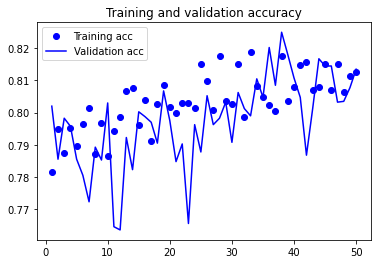

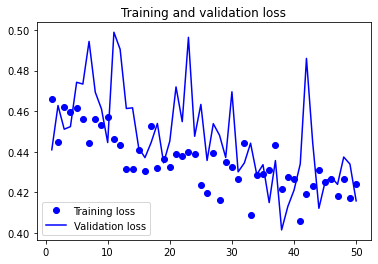

In [24]:
import matplotlib.pyplot as plt
acc = historyb.history['acc']
val_acc = historyb.history['val_acc']
loss = historyb.history['loss']
val_loss = historyb.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

CHANGING THE NETWORK TO CHECK IF IT PROVIDES BETTER ACCURACY
IN THE THIRD LAYER WE CHANGED THE FILTERS TO 256

In [25]:
# Building the network2

from keras import layers
from keras import models

model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

USE THE SAME OPTIMIZER TO CHECK IF PRODUCES BETTER RESULTS 

In [27]:
from keras import optimizers
model2.compile(loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['acc'])

ABOVE THE ACCURACY IS BETTER FOR 50 EPOCHS AND 200 STEPS SO WE USE THE SAM HERE TO CHECK BETTER MODEL ON SAME VALUES

In [28]:
history3 = model2.fit_generator(
            train_generator,
            steps_per_epoch=200,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=200)

/Users/nishithareddy/.local/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
200/200 [==============================] - 15s 70ms/step - loss: 0.6387 - acc: 0.6482 - val_loss: 0.6883 - val_acc: 0.5955
Epoch 2/50
200/200 [==============================] - 13s 67ms/step - loss: 0.6293 - acc: 0.6543 - val_loss: 0.6569 - val_acc: 0.5880
Epoch 3/50
200/200 [==============================] - 13s 66ms/step - loss: 0.6159 - acc: 0.6510 - val_loss: 0.6906 - val_acc: 0.5850
Epoch 4/50
200/200 [==============================] - 13s 67ms/step - loss: 0.6020 - acc: 0.6773 - val_loss: 0.6080 - val_acc: 0.6405
Epoch 5/50
200/200 [==============================] - 15s 76ms/step - loss: 0.5841 - acc: 0.7035 - val_loss: 0.5826 - val_acc: 0.7265
Epoch 6/50
200/200 [==============================] - 13s 67ms/step - loss: 0.5687 - acc: 0.7188 - val_loss: 0.6842 - val_acc: 0.6208
Epoch 7/50
200/200 [==============================] - 13s 64ms/step - loss: 0.5545 - acc: 0.7272 - val_loss: 0.5402 - val_acc: 0.7475
Epoch 8/50
200/200 [==============================] - 13s 67ms

MODEL 2 DOEST NOT WORK BETTER THAN MODEL 1

CHANGE OPTIMIZER FOR MODEL ONE TO GET BETTER RESULTS

USING ADAMAX

In [34]:
#change optimizer on model to adamax
from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer='adamax',
    metrics=['acc'])

In [ ]:
BECAUSE WE USED 50 EPOCHS AND 200 STEPS ABOVE FOR GOOD RESULTS WE CONTINUE WITH THAT

In [36]:
# Training for 50 epochs 200 steps
history2 = model.fit_generator(
            train_generator,
            steps_per_epoch=200,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=200)

Epoch 1/50
200/200 [==============================] - 13s 64ms/step - loss: 0.3854 - acc: 0.8257 - val_loss: 0.3960 - val_acc: 0.8298
Epoch 2/50
200/200 [==============================] - 12s 61ms/step - loss: 0.3978 - acc: 0.8273 - val_loss: 0.3930 - val_acc: 0.8257
Epoch 3/50
200/200 [==============================] - 12s 62ms/step - loss: 0.3673 - acc: 0.8410 - val_loss: 0.3924 - val_acc: 0.8282
Epoch 4/50
200/200 [==============================] - 13s 63ms/step - loss: 0.3666 - acc: 0.8397 - val_loss: 0.3736 - val_acc: 0.8380
Epoch 5/50
200/200 [==============================] - 13s 63ms/step - loss: 0.3666 - acc: 0.8425 - val_loss: 0.4526 - val_acc: 0.8030
Epoch 6/50
200/200 [==============================] - 13s 66ms/step - loss: 0.3770 - acc: 0.8353 - val_loss: 0.4160 - val_acc: 0.8235
Epoch 7/50
200/200 [==============================] - 13s 63ms/step - loss: 0.3618 - acc: 0.8420 - val_loss: 0.3846 - val_acc: 0.8295
Epoch 8/50
200/200 [==============================] - 14s 68ms

THIS OPTIMIZER PRODUCES 87.45 BETTER THAN SGD

PLOT THE GRAPH FOR ACCURACY AND LOSS 

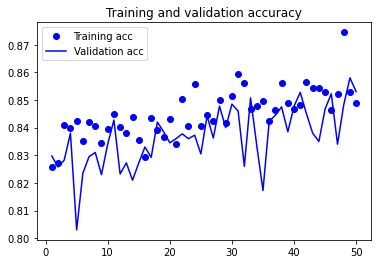

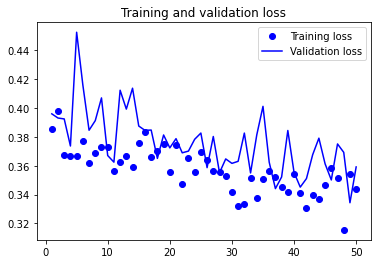

In [37]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

TRY ANOTHER OPTIMIZER-ADAM

In [38]:
#change optimizer on model 1
from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc'])

CONTINUE WITH THE SAME FIT 

In [39]:
# Training for 50 epochs 200 s
history4 = model.fit_generator(
            train_generator,
            steps_per_epoch=200,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=200)

Epoch 1/50
200/200 [==============================] - 13s 64ms/step - loss: 0.3903 - acc: 0.8338 - val_loss: 0.3713 - val_acc: 0.8393
Epoch 2/50
200/200 [==============================] - 14s 68ms/step - loss: 0.3872 - acc: 0.8315 - val_loss: 0.3840 - val_acc: 0.8385
Epoch 3/50
200/200 [==============================] - 13s 64ms/step - loss: 0.3662 - acc: 0.8407 - val_loss: 0.4127 - val_acc: 0.8350
Epoch 4/50
200/200 [==============================] - 15s 74ms/step - loss: 0.3687 - acc: 0.8388 - val_loss: 0.3703 - val_acc: 0.8422
Epoch 5/50
200/200 [==============================] - 14s 69ms/step - loss: 0.3819 - acc: 0.8382 - val_loss: 0.3985 - val_acc: 0.8248
Epoch 6/50
200/200 [==============================] - 13s 63ms/step - loss: 0.3748 - acc: 0.8380 - val_loss: 0.4328 - val_acc: 0.8052
Epoch 7/50
200/200 [==============================] - 13s 66ms/step - loss: 0.3625 - acc: 0.8460 - val_loss: 0.3647 - val_acc: 0.8415
Epoch 8/50
200/200 [==============================] - 13s 64ms

THE ACCURACY DOESNOT IMPROVE WITH ADAM (85%)
IT IS BETTER WITH ADAMAX

CHANGE THE OPTIMIZER ON MODEL 1 TO nadam

In [40]:

from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer='nadam',
    metrics=['acc'])

In [42]:
# Training for 50 epochs 200 steps
history5 = model.fit_generator(
            train_generator,
            steps_per_epoch=200,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=200)

Epoch 1/50
200/200 [==============================] - 14s 69ms/step - loss: 0.3521 - acc: 0.8490 - val_loss: 0.3705 - val_acc: 0.8395
Epoch 2/50
200/200 [==============================] - 19s 93ms/step - loss: 0.3343 - acc: 0.8528 - val_loss: 0.3988 - val_acc: 0.8370
Epoch 3/50
200/200 [==============================] - 16s 77ms/step - loss: 0.3383 - acc: 0.8595 - val_loss: 0.3439 - val_acc: 0.8522
Epoch 4/50
200/200 [==============================] - 14s 72ms/step - loss: 0.3403 - acc: 0.8522 - val_loss: 0.3804 - val_acc: 0.8317
Epoch 5/50
200/200 [==============================] - 14s 69ms/step - loss: 0.3452 - acc: 0.8547 - val_loss: 0.3382 - val_acc: 0.8535
Epoch 6/50
200/200 [==============================] - 16s 81ms/step - loss: 0.3322 - acc: 0.8570 - val_loss: 0.3625 - val_acc: 0.8420
Epoch 7/50
200/200 [==============================] - 16s 82ms/step - loss: 0.3544 - acc: 0.8462 - val_loss: 0.3804 - val_acc: 0.8370
Epoch 8/50
200/200 [==============================] - 17s 83ms

THIS MODEL IS 87 AS WELL AS ADAMAX  SO CHOSE THIS AND MAKE FURTHR CHANGES IN FIT TO GET MORE ACCURACY

PLOT THE GRAPHS

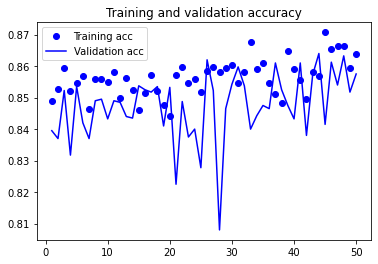

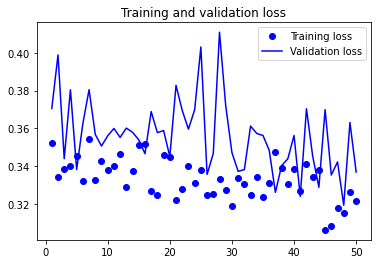

In [43]:
import matplotlib.pyplot as plt
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

CHANGE EPOCHS TO 50 AND STEPS 400 for nadam

In [46]:
# Training for 20 epochs 1000 s
history7 = model.fit_generator(
            train_generator,
            steps_per_epoch=1000,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=1000)

Epoch 1/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.2914 - acc: 0.8776 - val_loss: 0.3206 - val_acc: 0.8665
Epoch 2/20
1000/1000 [==============================] - 69s 69ms/step - loss: 0.2929 - acc: 0.8802 - val_loss: 0.3443 - val_acc: 0.8510
Epoch 3/20
1000/1000 [==============================] - 69s 69ms/step - loss: 0.2863 - acc: 0.8783 - val_loss: 0.3259 - val_acc: 0.8620
Epoch 4/20
1000/1000 [==============================] - 73s 73ms/step - loss: 0.2918 - acc: 0.8764 - val_loss: 0.3225 - val_acc: 0.8630
Epoch 5/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.2886 - acc: 0.8772 - val_loss: 0.3391 - val_acc: 0.8613
Epoch 6/20
1000/1000 [==============================] - 67s 67ms/step - loss: 0.2823 - acc: 0.8818 - val_loss: 0.3232 - val_acc: 0.8615
Epoch 7/20
1000/1000 [==============================] - 76s 76ms/step - loss: 0.2923 - acc: 0.8759 - val_loss: 0.3145 - val_acc: 0.8684
Epoch 8/20
1000/1000 [==========================

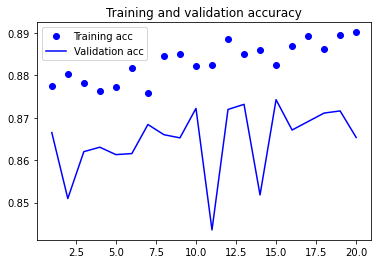

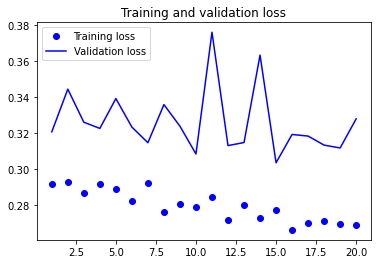

In [47]:
import matplotlib.pyplot as plt
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NOW TRYING 15 EPOCHS AND 1500 STEPS

In [48]:
# Training for 15 epochs 1500 s
history8 = model.fit_generator(
            train_generator,
            steps_per_epoch=1500,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=1500)

Epoch 1/15
1500/1500 [==============================] - 105s 70ms/step - loss: 0.2644 - acc: 0.8910 - val_loss: 0.3134 - val_acc: 0.8736
Epoch 2/15
1500/1500 [==============================] - 105s 70ms/step - loss: 0.2623 - acc: 0.8922 - val_loss: 0.3258 - val_acc: 0.8688
Epoch 3/15
1500/1500 [==============================] - 103s 68ms/step - loss: 0.2654 - acc: 0.8923 - val_loss: 0.3288 - val_acc: 0.8635
Epoch 4/15
1500/1500 [==============================] - 103s 69ms/step - loss: 0.2625 - acc: 0.8906 - val_loss: 0.3471 - val_acc: 0.8543
Epoch 5/15
1500/1500 [==============================] - 103s 68ms/step - loss: 0.2653 - acc: 0.8916 - val_loss: 0.3503 - val_acc: 0.8617
Epoch 6/15
1500/1500 [==============================] - 112s 74ms/step - loss: 0.2595 - acc: 0.8929 - val_loss: 0.3273 - val_acc: 0.8693
Epoch 7/15
1500/1500 [==============================] - 103s 69ms/step - loss: 0.2570 - acc: 0.8939 - val_loss: 0.3300 - val_acc: 0.8654
Epoch 8/15
1500/1500 [===================

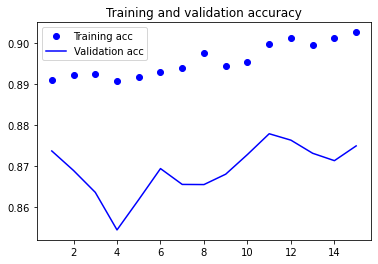

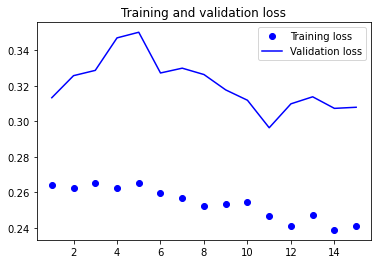

In [49]:
import matplotlib.pyplot as plt
acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# THIS IS THE BEST RESULT OF 90% ACCURACY WITH 50 EPOCHS AND 1500 STEPS MODEL1 AND NADAM

SAVE THE BEST MODEL IN YOUR SYSTEM TO USE IT FURTHER TO TRAIN YOUR DATA

In [70]:
# Saving the best model
model.save('tumor_and_nontumor.Best.h5')

# Predicting on test dataset using the model trained above is mentioned in other file